In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\ClassWork\Datasets\monthly-milk-production-pounds-p.csv",index_col=0)
df.index = pd.to_datetime(df.index).to_period("M")

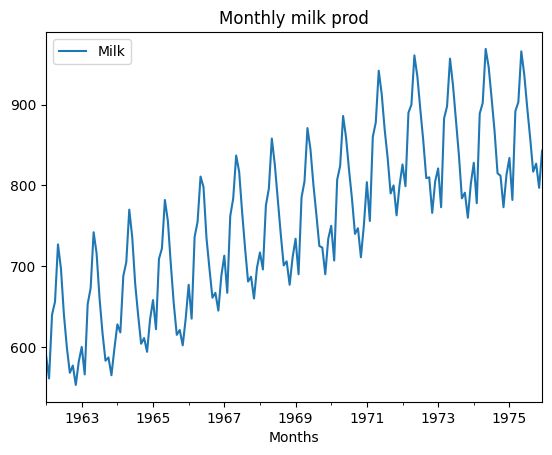

In [3]:
df.plot()
plt.title("Monthly milk prod")
plt.xlabel("Months")
plt.show()

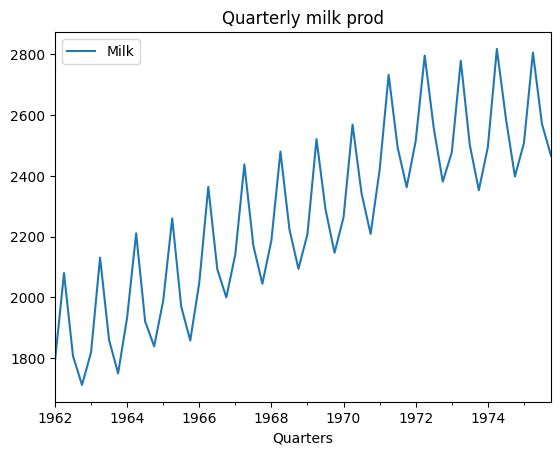

In [4]:
downsampled = df.resample('Q').sum()
downsampled.index.rename('Quarter',inplace=True)
downsampled.plot()
plt.title("Quarterly milk prod")
plt.xlabel("Quarters")
plt.show()

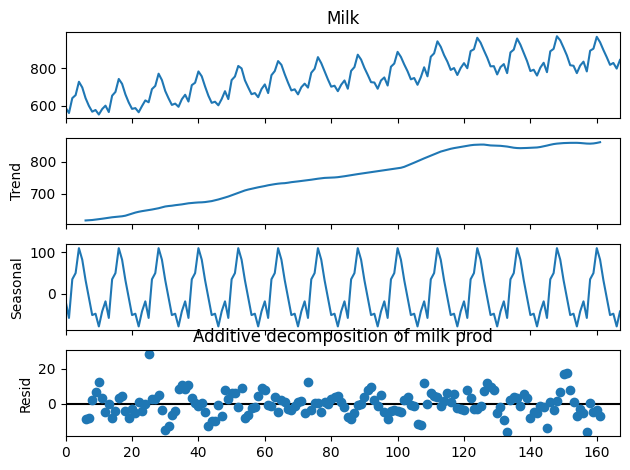

In [5]:
df = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\ClassWork\Datasets\monthly-milk-production-pounds-p.csv")
series = df['Milk']
results = seasonal_decompose(series,model="additive",period=12)
results.plot()
plt.title("Additive decomposition of milk prod")
plt.show()

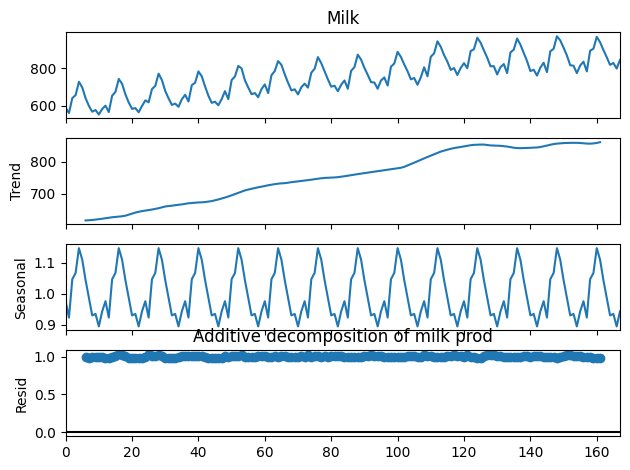

In [6]:
results = seasonal_decompose(series,model="multiplicative",period=12)
results.plot()
plt.title("Additive decomposition of milk prod")
plt.show()

In [ ]:
######## Rolling mean and forecasting                                                                                               

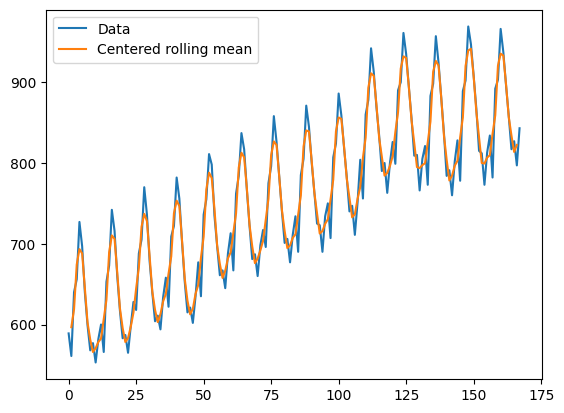

In [14]:
span = 3
fcast = series.rolling(span, center= True).mean()
plt.plot(series,label='Data')
plt.plot(fcast,label='Centered rolling mean')
plt.legend(loc='best')
plt.show()

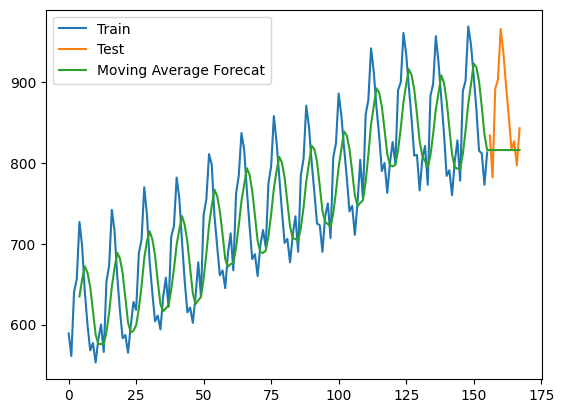

71.4970861877135


In [65]:
y_train = df['Milk'][:-12]
y_test = df['Milk'][-12:]

span = 5
fcast = y_train.rolling(span,center=False).mean()
MA = fcast.iloc[-1]
MA_Series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast,MA_Series],ignore_index=True)
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Test')
plt.plot(MA_fcast,label='Moving Average Forecat')
plt.legend(loc = 'best')
plt.show()
rms= np.sqrt(mean_squared_error(y_test,MA_Series))

print(rms)

In [38]:
fcast

0             NaN
1      596.666667
2      619.000000
3      674.333333
4      693.333333
          ...    
163    857.000000
164    834.000000
165    813.666667
166    822.333333
167           NaN
Name: Milk, Length: 168, dtype: float64

In [46]:
###### Simple Exponential Smoothing 

C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


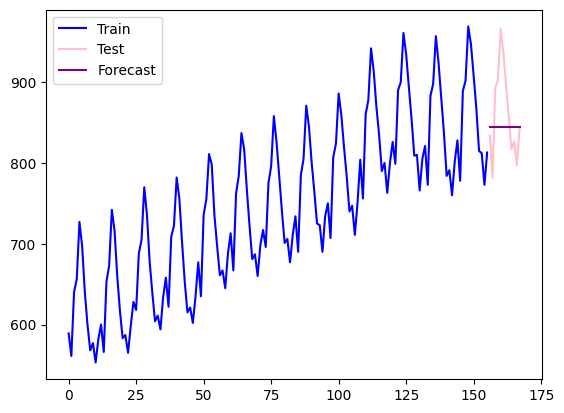

In [66]:
from statsmodels.tsa.api import SimpleExpSmoothing

y_train = df['Milk'][:-12]
y_test = df['Milk'][-12:]
alpha = 0.08
ses = SimpleExpSmoothing(y_train)
fit1= ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.legend(loc = 'best')
plt.show()

In [67]:
print(fit1.params)
print("RMSE = ",np.sqrt(mean_squared_error(y_test,fcast1)))

{'smoothing_level': 0.08, 'smoothing_trend': nan, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 589.0, 'initial_trend': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
RMSE =  56.978645249049066


In [47]:
#### Bike sharing

In [7]:
df=pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\Kaggle\Bike sharing demand\train.csv",index_col=0,parse_dates=['datetime'])
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


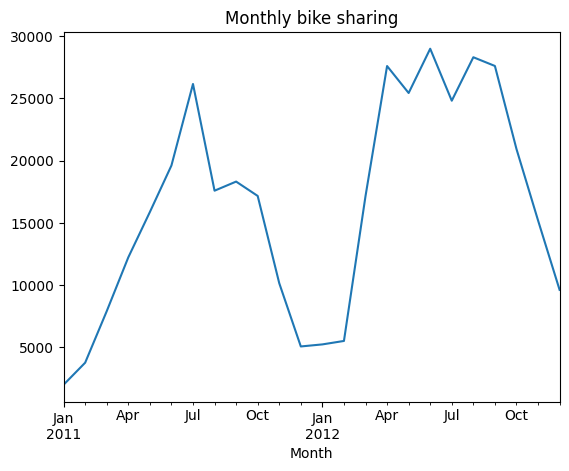

In [14]:
casual = df['casual']
mon_cas = casual.resample('M').sum()
mon_cas.index.rename('Quarter',inplace=True)
mon_cas.plot()
plt.title("Monthly bike sharing")
plt.xlabel("Month")
plt.show()

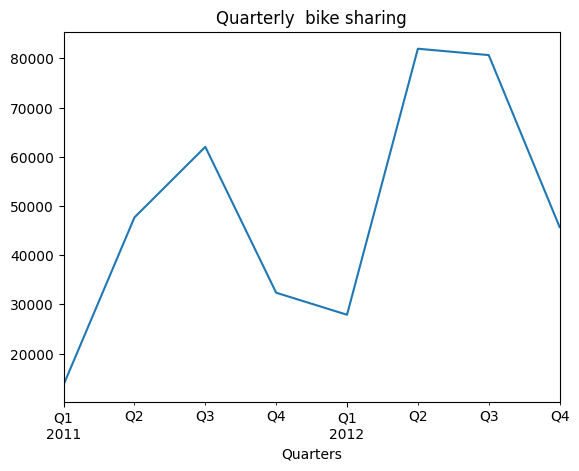

In [15]:
quarter_cas = casual.resample('Q').sum()
quarter_cas.index.rename('Quarter',inplace=True)
quarter_cas.plot()
plt.title("Quarterly  bike sharing")
plt.xlabel("Quarters")
plt.show()

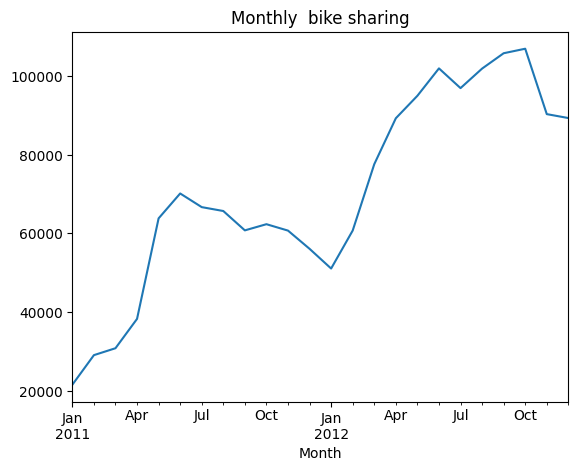

In [16]:
registered = df['registered']
mon_reg = registered.resample('M').sum()
mon_reg.index.rename('Quarter',inplace=True)
mon_reg.plot()
plt.title("Monthly  bike sharing")
plt.xlabel("Month")
plt.show()

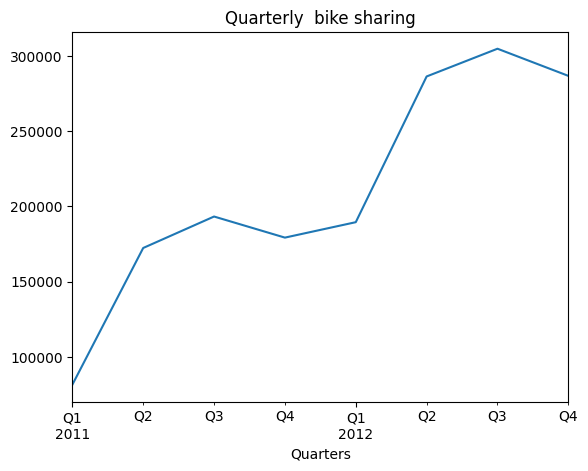

In [17]:
quarter_reg = registered.resample('Q').sum()
quarter_reg.index.rename('Quarter',inplace=True)
quarter_reg.plot()
plt.title("Quarterly  bike sharing")
plt.xlabel("Quarters")
plt.show()